# Los Angeles, LAX Airport
NOAA GHCN Data: https://www.ncei.noaa.gov/cdo-web/datasets

In [1]:
import pandas as pd
import numpy as np

In [2]:
weather=pd.read_csv("LAX_40.csv")
weather['DATE']= pd.to_datetime(weather['DATE'])
weather.set_index(["DATE"],inplace=True)
weather = weather.loc['1993-01-01':'2022-12-31']

In [3]:
# The documention details the core weather variables. (These variables have the lowest null values.)
df = weather[["AWND","PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]]
df.apply(pd.isnull).sum()

AWND       3
PRCP       0
SNOW    9316
SNWD    8647
TMAX       0
TMIN       0
dtype: int64

# AWND

In [4]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).sum()
w = w[w!=0]

b = pd.cut(w, bins=[0, 1, 5, np.inf], labels=['0-1','2-5','6 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

          AWND  Number
0          0-1       0
1          2-5       1
2  6 and above       0


In [5]:
w = df.AWND.isna().groupby(df.AWND.notna().cumsum()).cumsum() #cumsum for index location
w = w[w!=0]
w

DATE
1997-03-01    1
1997-03-02    2
1997-03-03    3
Name: AWND, dtype: int64

In [6]:
filtered_df = df.loc['1997-02-28':'1997-03-04']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1997-02-28,14.32,0.0,0.0,0.0,65,48
1997-03-01,NaN,0.0,NaN,0.0,64,46
1997-03-02,NaN,0.0,NaN,0.0,60,45
1997-03-03,NaN,0.0,NaN,0.0,59,47
1997-03-04,6.71,0.0,NaN,0.0,65,47


In [7]:
df.loc[df['AWND'].isnull(),'AWND']=df['AWND'].interpolate()

C:\Users\kenny\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [8]:
filtered_df = df.loc['1997-02-28':'1997-03-04']
filtered_df

,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,
1997-02-28,14.3200,0.0,0.0,0.0,65,48
1997-03-01,12.4175,0.0,NaN,0.0,64,46
1997-03-02,10.5150,0.0,NaN,0.0,60,45
1997-03-03,8.6125,0.0,NaN,0.0,59,47
1997-03-04,6.7100,0.0,NaN,0.0,65,47


In [9]:
df.apply(pd.isnull).sum()

AWND       0
PRCP       0
SNOW    9316
SNWD    8647
TMAX       0
TMIN       0
dtype: int64

# SNOW

In [10]:
s = df.SNOW.isna().groupby(df.SNOW.notna().cumsum()).sum()
s = s[s!=0]

b = pd.cut(s, bins=[0, 1, 1000, np.inf], labels=['0-1','2-1000','1001 and above'])
out = b.groupby(b).size().reset_index(name='Cases')
print (out)

             SNOW  Cases
0             0-1      0
1          2-1000      1
2  1001 and above      3


In [11]:
s = df.SNOW.isna().groupby(df.SNOW.notna().cumsum()).cumsum() #cumsum for index location
s = s[s!=0]
s

DATE
1997-03-01       1
1997-03-02       2
1997-03-03       3
1997-03-04       4
1997-03-05       5
              ... 
2022-12-27    1337
2022-12-28    1338
2022-12-29    1339
2022-12-30    1340
2022-12-31    1341
Name: SNOW, Length: 9316, dtype: int64

<AxesSubplot:xlabel='DATE'>

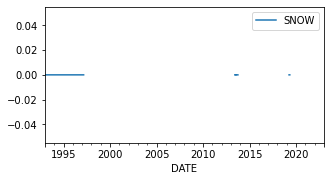

In [12]:
df.plot(y = ['SNOW'], figsize=(5,2.5))

C:\Users\kenny\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='DATE'>

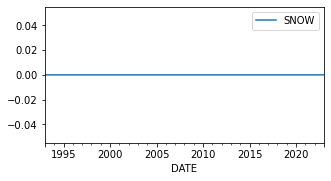

In [13]:
df.loc[df['SNOW'].isnull(),'SNOW']=df["SNOW"].fillna(0)
df.plot(y = ['SNOW'], figsize=(5,2.5))

In [14]:
df.apply(pd.isnull).sum()

AWND       0
PRCP       0
SNOW       0
SNWD    8647
TMAX       0
TMIN       0
dtype: int64

# SNWD

In [15]:
sd = df.SNWD.isna().groupby(df.SNWD.notna().cumsum()).sum()
sd = sd[sd!=0]

b = pd.cut(sd, bins=[0, 1, 1000, np.inf], labels=['0-1','2-1000','1001 and above'])
out = b.groupby(b).size().reset_index(name='Number')
print (out)

             SNWD  Number
0             0-1       3
1          2-1000       1
2  1001 and above       3


In [16]:
sd = df.SNWD.isna().groupby(df.SNWD.notna().cumsum()).cumsum() #cumsum for index location
sd = sd[sd!=0]
sd

DATE
1998-12-25       1
1998-12-31       1
1999-02-01       1
1999-02-02       2
1999-02-03       3
              ... 
2022-12-27    1337
2022-12-28    1338
2022-12-29    1339
2022-12-30    1340
2022-12-31    1341
Name: SNWD, Length: 8647, dtype: int64

array([<AxesSubplot:xlabel='DATE'>], dtype=object)

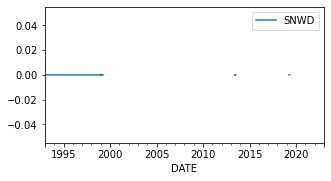

In [17]:
df.plot(y = ['SNWD'],subplots=True, figsize=(5,2.5))

C:\Users\kenny\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<AxesSubplot:xlabel='DATE'>

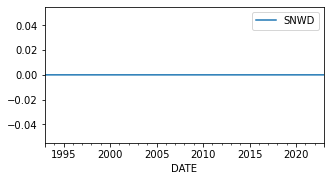

In [18]:
df.loc[df['SNWD'].isnull(),'SNWD']=df["SNWD"].fillna(0)
df.plot(y = ['SNWD'], figsize=(5,2.5))

In [19]:
df.apply(pd.isnull).sum()

AWND    0
PRCP    0
SNOW    0
SNWD    0
TMAX    0
TMIN    0
dtype: int64

In [20]:
df= df[["AWND","PRCP","TMAX", "TMIN"]].copy()
df.apply(pd.isnull).sum()

AWND    0
PRCP    0
TMAX    0
TMIN    0
dtype: int64

In [21]:
df.to_csv('LAX_30_Corrected.csv')

# Data Exploration

In [22]:
import seaborn as sns

In [23]:
LAX = pd.read_csv("LAX_30_Corrected.csv",index_col="DATE")
LAX

,AWND,PRCP,TMAX,TMIN
DATE,,,,
1993-01-01,5.82,0.00,61,46
1993-01-02,9.40,0.44,56,46
1993-01-03,6.71,0.00,58,41
1993-01-04,6.71,0.00,58,41
1993-01-05,9.17,0.01,62,42
...,...,...,...,...
2022-12-27,4.70,0.49,64,53
2022-12-28,4.47,0.01,63,53
2022-12-29,4.47,0.00,60,55


<AxesSubplot:>

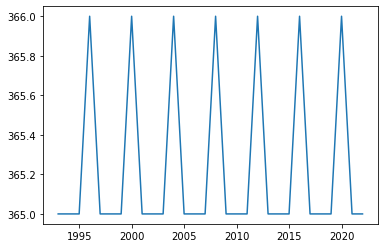

In [24]:
LAX.index = pd.to_datetime(LAX.index)
Yr=LAX.index.year.value_counts().sort_index()
Yr.plot()

In [25]:
LAX.describe()

,AWND,PRCP,TMAX,TMIN
count,10957.000000,10957.000000,10957.000000,10957.000000
mean,7.311247,0.032646,70.577804,56.666423
std,2.117660,0.181422,7.299598,6.764285
min,1.790000,0.000000,51.000000,35.000000
25%,5.820000,0.000000,65.000000,52.000000
50%,7.160000,0.000000,70.000000,57.000000
75%,8.280000,0.000000,75.000000,62.000000
max,21.920000,4.530000,105.000000,77.000000


array([<AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>,
       <AxesSubplot:xlabel='DATE'>, <AxesSubplot:xlabel='DATE'>],
      dtype=object)

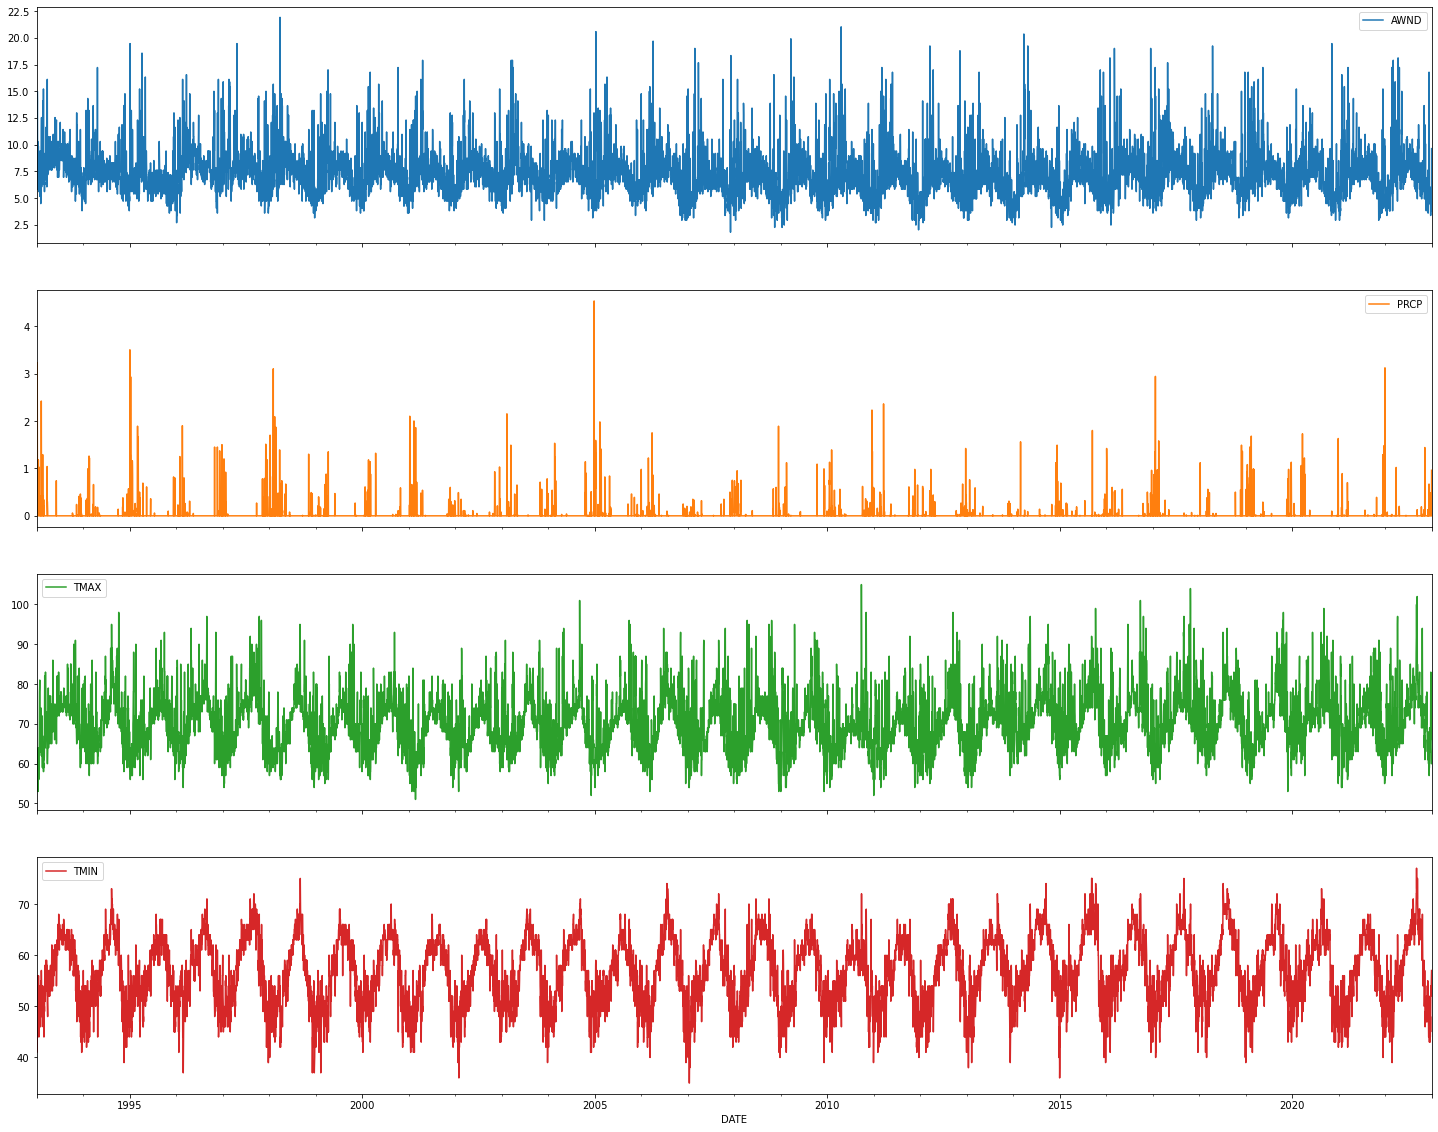

In [26]:
LAX.plot(subplots=True, figsize=(25,20))

array([[<AxesSubplot:title={'center':'AWND'}>,
        <AxesSubplot:title={'center':'PRCP'}>],
       [<AxesSubplot:title={'center':'TMAX'}>,
        <AxesSubplot:title={'center':'TMIN'}>]], dtype=object)

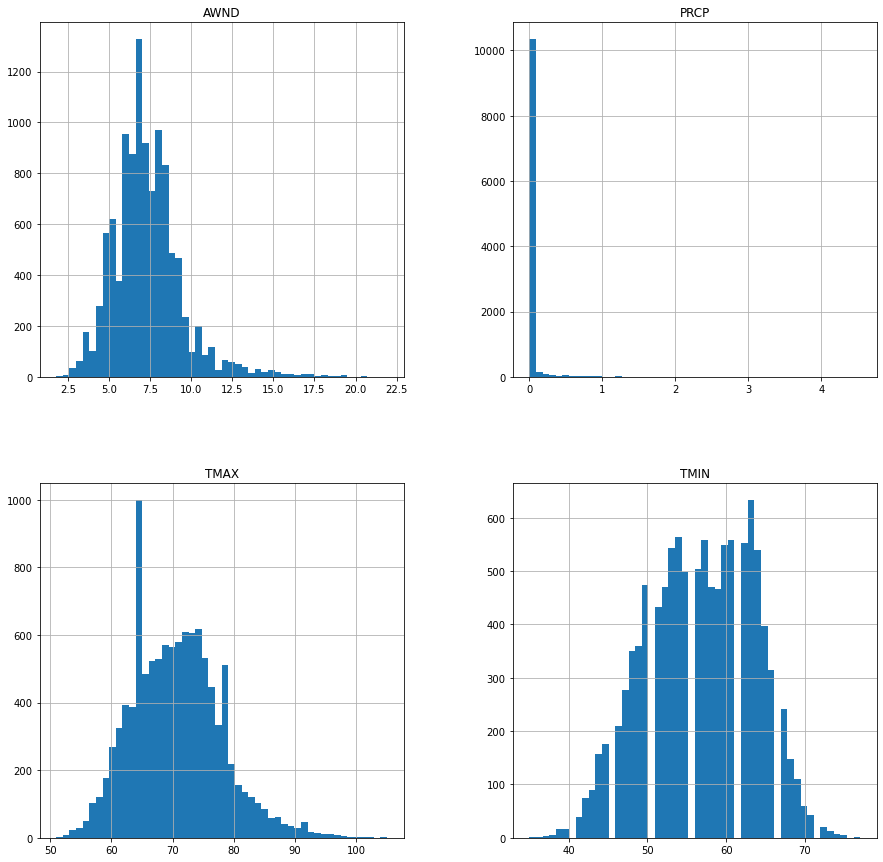

In [27]:
LAX.hist(bins=50,figsize=(15,15))

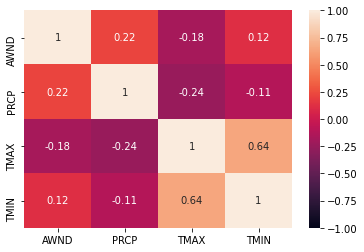

In [28]:
heatmap = sns.heatmap(LAX.corr(), vmin=-1, vmax=1, annot=True)